# Load library

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load dataset

In [44]:
iris = datasets.load_iris()

In [45]:
X = iris.data[:, 2:4]
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [46]:
y = iris.target

# Split data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)

In [48]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (105, 2)
X_test.shape = (45, 2)


# Standardized data
### ไม่ต้อง scaler ก็ได้สำหรับ decision tree

In [49]:
scale = StandardScaler()
X_train_t = scale.fit_transform(X_train)
X_test_t = scale.transform(X_test)

# Train model

In [50]:
model = DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [51]:
criterion = 'gini'
max_depth = 4
min_samples_split = 2

In [52]:
model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split)
model

DecisionTreeClassifier(max_depth=4)

In [53]:
model.fit(X_train_t, y_train)

DecisionTreeClassifier(max_depth=4)

In [54]:
## predict
y_pred = model.predict(X_test_t)
y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [55]:
## Miss Classification
sumMiss = (y_test != y_pred).sum()
print(f'Miss Classification = {sumMiss}')

Miss Classification = 1


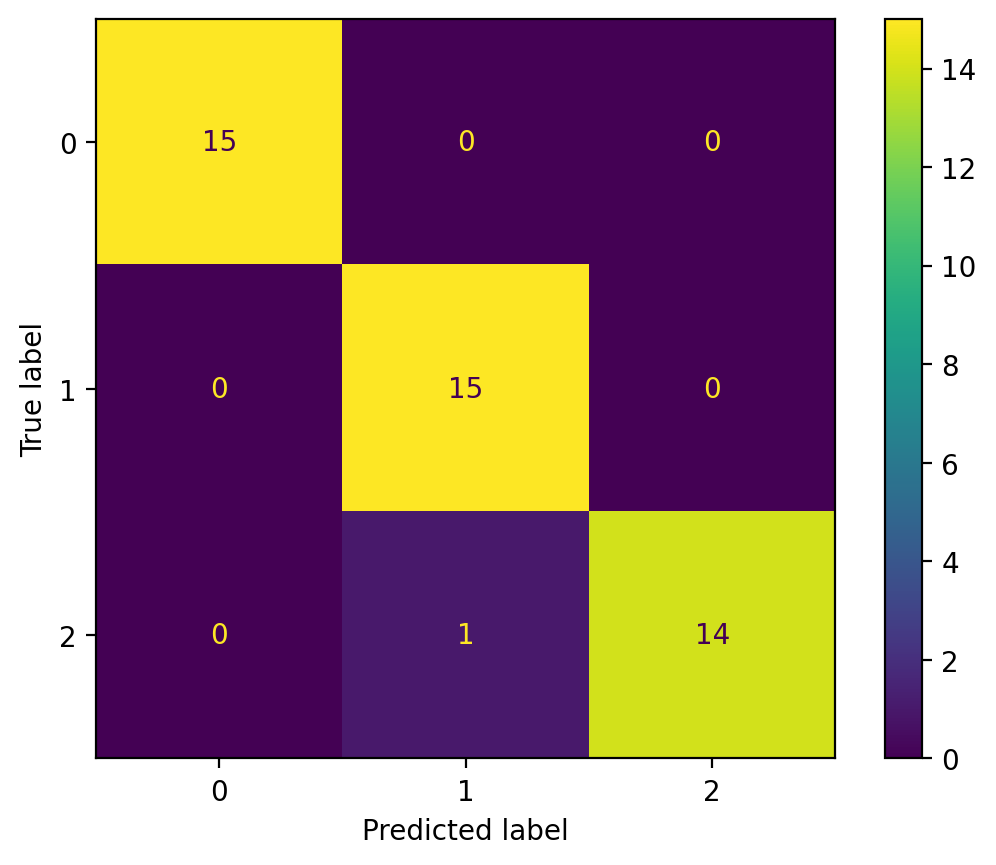

In [58]:
## confusion metric
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot()

In [59]:
## classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



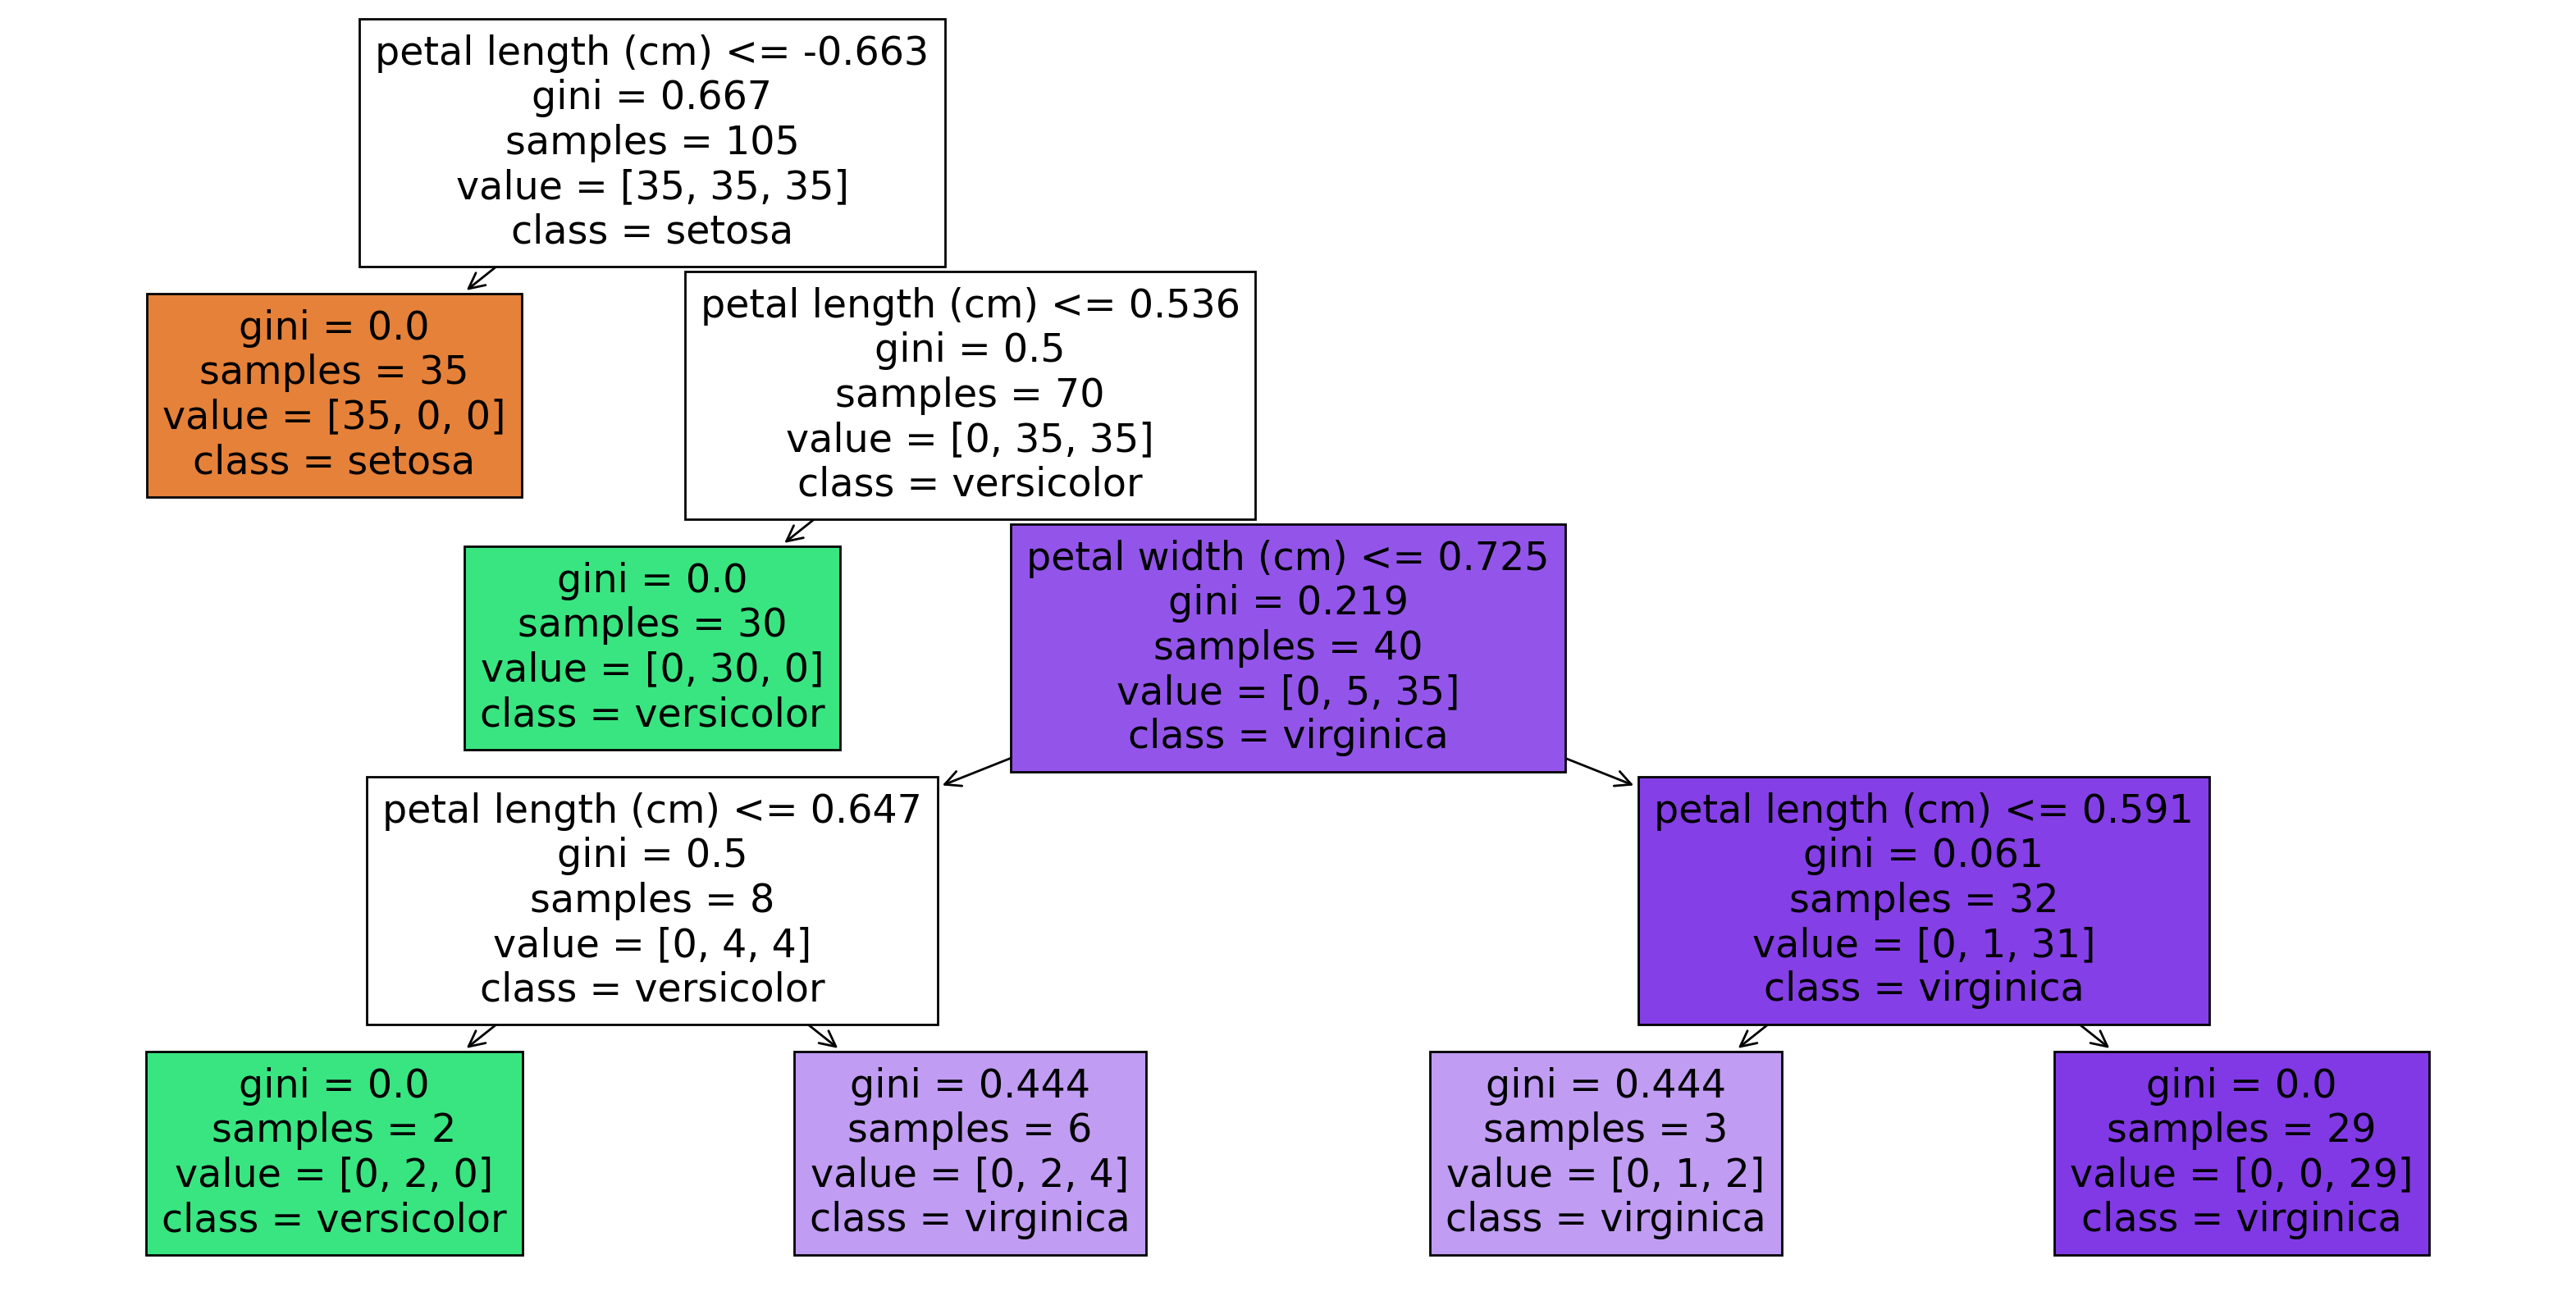

In [74]:
plt.figure(figsize = (20, 10))
plt.title("Decision tree trained on all the iris features")
plot_tree(model, filled=True, feature_names=iris.feature_names[2:4], class_names=list(iris.target_names));

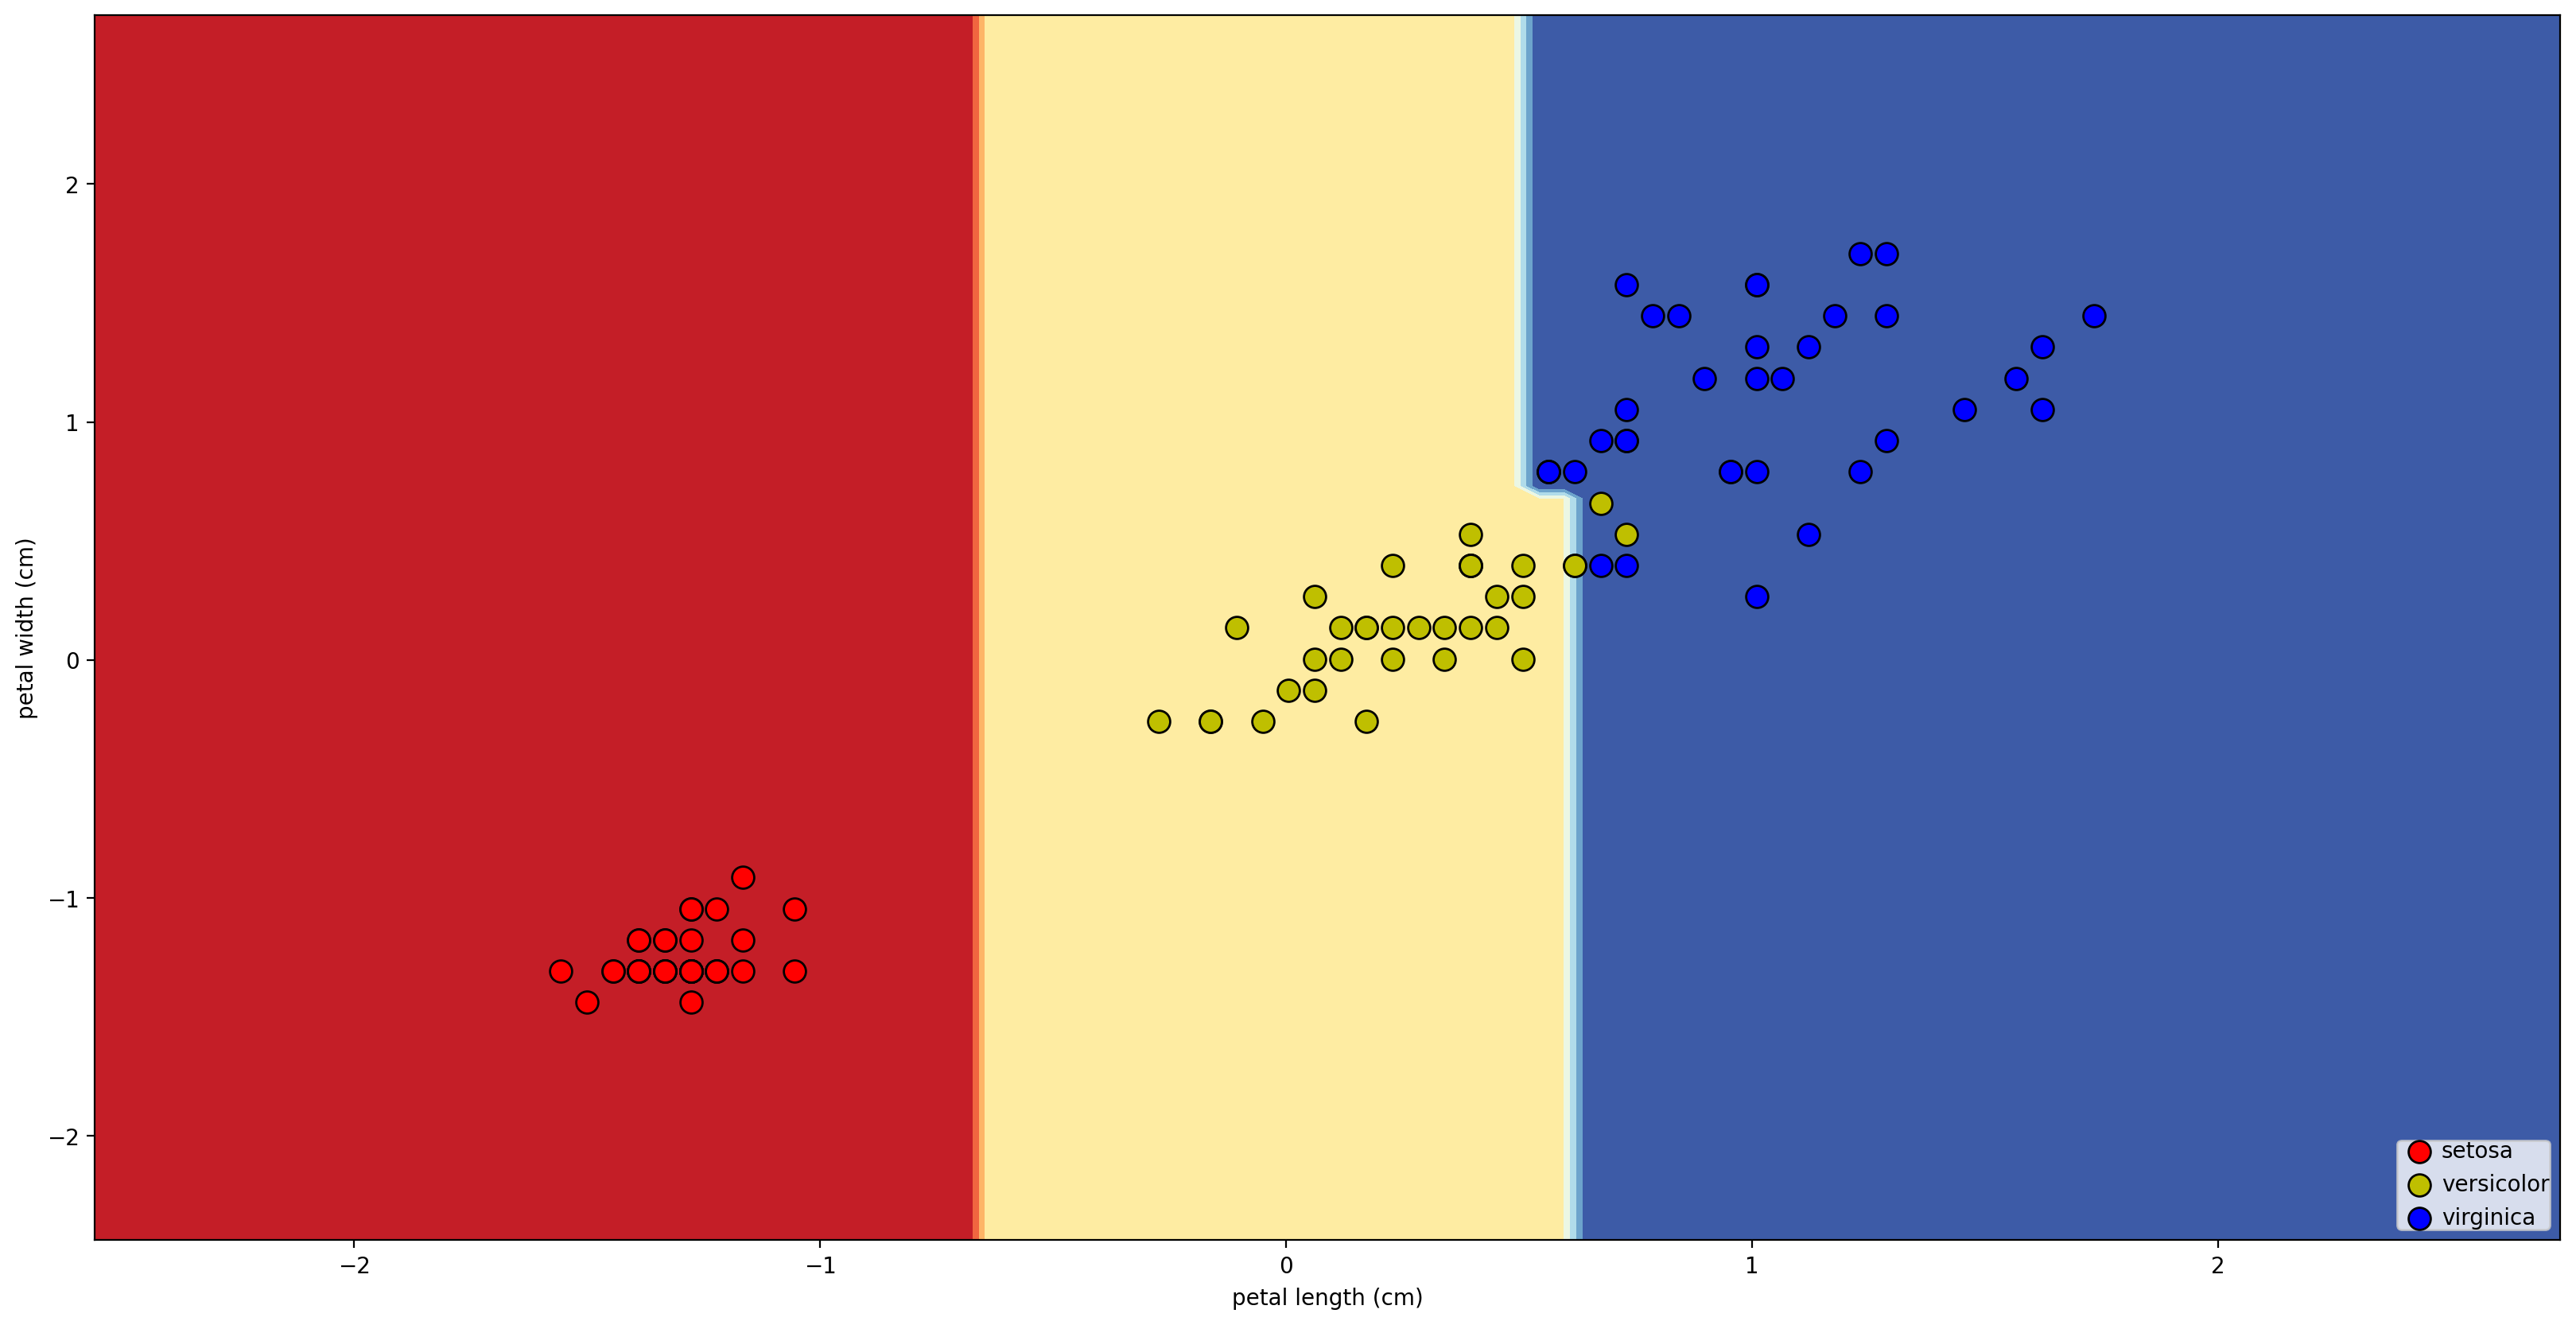

In [106]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(1, 1, figsize = (20, 10))
#fig = plt.figure(figsize = (20, 10))
DecisionBoundaryDisplay.from_estimator(
    model,
    X_train_t,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    #ax=ax,
    xlabel=iris.feature_names[2],
    ylabel=iris.feature_names[3],
    ax = ax
)

plot_colors = "ryb"

for i, color in zip(range(3), plot_colors):
    idx = np.where(y_train == i)
    plt.scatter(
        X_train_t[idx, 0],
        X_train_t[idx, 1],
        c=color,
        label=iris.target_names[i],
        #cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=100,
    )
plt.legend(loc="lower right", borderpad=0, handletextpad=0);
